# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
# geospatial plotting deps
import branca.colormap as cm
import folium
import geopandas as gpd

import numpy as np
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import fetch_cases, get_population, get_country_data, fetch_cases_last_execution

# get a list of all country names
countries = fetch_cases().index.drop_duplicates()

data = []

for region in countries:
    c, _, _ = get_country_data(region)   # get cumulative infections c
    c = c[-15:]
    try:
        population = get_population(region)
        new_cases = int(c[-1] - c[-15]) 
        incidence = new_cases / population * 100000. 
        data += [(region, population, new_cases, round(incidence, 1))]
    except:
        print(f"Skip {region}")    # skip regions for which we have no population numbers

data.sort(key=lambda x: x[3], reverse=True)

# turn into pandas DataFrame for easier display
table = pd.DataFrame(data, columns=["country", "population", "new cases", "14-day-incidence"]).set_index("country")

# Show last update date
import time
print(f"Last updated {time.asctime()}")

Skip Diamond Princess
Skip MS Zaandam
Last updated Sat Aug 15 09:45:09 2020


## Table for all countries

In [2]:
table.sort_index()

population  new cases  14-day-incidence
country                                                                  
Afghanistan                         38928341        756               1.9
Albania                              2877800       1841              64.0
Algeria                             43851043       7270              16.6
Andorra                                77265         64              82.8
Angola                              32866268        704               2.1
Antigua and Barbuda                    97928          2               2.0
Argentina                           45195777      91135             201.6
Armenia                              2963234       2749              92.8
Australia                           25459700       5755              22.6
Austria                              9006400       1746              19.4
Azerbaijan                          10139175       2140              21.1
Bahamas                               393248        545             138.6
Bahrain                              1701583       5070             298.0
Bangladesh                         164689383      34220              20.8
Barbados                              287371         38              13.2
Belarus                              9449321       1500              15.9
Belgium                             11589616       8362              72.2
Belize                                397621        308              77.5
Benin                               12123198        209               1.7
Bhutan                                771612         32               4.1
Bolivia                             11673029      21161             181.3
Bosnia and Herzegovina               3280815       3659             111.5
Botswana                             2351625        410              17.4
Brazil                             212559409     563958             265.3
Brunei                                437483          1               0.2
Bulgaria                             6948445       2553              36.7
Burkina Faso                        20903278        132               0.6
Burma                               54409794         21               0.0
Burundi                             11890781         25               0.2
Cabo Verde                            555988        685             123.2
Cambodia                            16718971         34               0.2
Cameroon                            26545864       1214               4.6
Canada                              37855702       5324              14.1
Central African Republic             4829764         44               0.9
Chad                                16425859         15               0.1
Chile                               19116209      26444             138.3
China                             1404676330       1559               0.1
Colombia                            50882884     149603             294.0
Comoros                               869595         25               2.9
Congo (Brazzaville)                  5518092        545               9.9
Congo (Kinshasa)                    89561404        535               0.6
Costa Rica                           5094114       9111             178.9
Cote d'Ivoire                       26378275        888               3.4
Croatia                              4105268       1119              27.3
Cuba                                11326616        621               5.5
Cyprus                               1207361        204              16.9
Czechia                             10708982       3119              29.1
Denmark                              5792203       1730              29.9
Djibouti                              988002        283              28.6
Dominica                               71991          0               0.0
Dominican Republic                  10847904      14839             136.8
Ecuador                             17643060      14054              79.7
Egypt                              102

## Table sorted by 14-day-incidence

In [3]:
table

population  new cases  14-day-incidence
country                                                                  
Peru                                32971846     108804             330.0
Maldives                              540542       1779             329.1
Panama                               4314768      14146             327.9
Bahrain                              1701583       5070             298.0
Colombia                            50882884     149603             294.0
Brazil                             212559409     563958             265.3
Israel                               8655541      20110             232.3
US                                 329466283     750948             227.9
Suriname                              586634       1188             202.5
Argentina                           45195777      91135             201.6
Kuwait                               4270563       8228             192.7
Bolivia                             11673029      21161             181.3
Costa Rica                           5094114       9111             178.9
Kosovo                               1810366       3026             167.1
South Africa                        59308690      85957             144.9
Bahamas                               393248        545             138.6
Chile                               19116209      26444             138.3
Dominican Republic                  10847904      14839             136.8
Montenegro                            628062        857             136.5
Qatar                                2881060       3837             133.2
Cabo Verde                            555988        685             123.2
Moldova                              4033963       4750             117.8
Spain                               46754783      54291             116.1
Luxembourg                            625976        710             113.4
Bosnia and Herzegovina               3280815       3659             111.5
Iraq                                40222503      43681             108.6
Malta                                 441539        452             102.4
Armenia                              2963234       2749              92.8
Romania                             19237682      17160              89.2
Eswatini                             1160164       1022              88.1
El Salvador                          6486201       5682              87.6
Kyrgyzstan                           6524191       5568              85.3
North Macedonia                      2083380       1761              84.5
Andorra                                77265         64              82.8
Ecuador                             17643060      14054              79.7
West Bank and Gaza                   5101416       3997              78.4
Belize                                397621        308              77.5
Honduras                             9904608       7453              75.2
Belgium                             11589616       8362              72.2
Oman                                 5106622       3584              70.2
Mexico                             127792286      86732              67.9
Monaco                                 39244         26              66.3
Guatemala                           17915567      11639              65.0
Albania                              2877800       1841              64.0
Kazakhstan                          18776707      11920              63.5
Namibia                              2540916       1597              62.9
India                             1380004385     829934              60.1
Singapore                            5850343       3375              57.7
Saudi Arabia                        34813867      19997              57.4
Philippines                        109581085      60306              55.0
Libya                                6871287       3706              53.9
Paraguay                             7132530       3684              51.7
Lebanon                              6

## Geospatial Plot

In [4]:
countries = gpd.read_file("./.country_shapes/countries.shp")
countries = countries.rename(columns={'CNTRY_NAME': 'country'})

In [5]:
countries_geospatial = countries.merge(table, on='country')

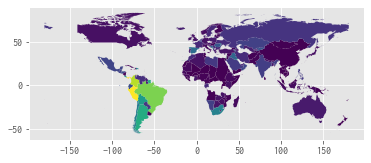

In [6]:
countries_geospatial.plot(column='14-day-incidence')

## Tutorial: Detailed calculation for one country

In [7]:
cases, deaths, label = get_country_data("Germany")

Cumulative cases yesterday (numbers for today are not known yet):

In [8]:
c_y = cases[-1]
c_y

223791

Cumulative cases 15 days ago (i.e. 14 days before yesterday)

In [9]:
c_15 = cases[-15]
c_15

210399

New cases from the last 14 days

In [10]:
c_new = c_y - c_15 
c_new

13392

Get the population data

In [11]:
population = get_population("Germany")
population

83128805

Compute the 14-day incidence per 100000, i.e. the cumulative number of new infections in the last 14 days, normalised by the countries population in units of 100000:

In [12]:
incidence = c_new / (population/100000)
incidence

16.10993926834387

This should compare to Compute numbers as they are provided, for example at https://www.ecdc.europa.eu/en/cases-2019-ncov-eueea (assuming the infection numbers from ECDE and JHU are identical).

In [13]:
# For debugging: When was the data downloaded
fetch_cases_last_execution()

'15/08/2020 09:13:06'